In [68]:
import pandas as pd
import random
import seaborn as sns
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
import pickle

In [4]:
swdata = pd.read_csv('stdata.csv')

In [20]:
# Grouped data of empire vs resistance
swdata['empire_or_resistance'].value_counts()

resistance    529
empire        471
Name: empire_or_resistance, dtype: int64

In [22]:
# Group data counts of characters by homeworld
swdata['homeworld'].value_counts()

Cerea           36
Skako           32
Dagobah         32
Serenno         31
Tund            31
Muunilinst      31
Tatooine        30
Vulpter         28
Zolan           28
Kashyyyk        28
Umbara          27
Concord Dawn    27
Corellia        27
Ryloth          26
Ojom            26
Quermia         25
Mon Cala        25
Stewjon         25
Eriadu          25
Iktotch         25
Malastare       25
Alderaan        24
Mirial          24
Trandosha       24
Bestine IV      23
Troiken         22
Socorro         22
Shili           22
Aleen Minor     21
Haruun Kal      21
Rodia           21
Tholoth         20
Sullust         19
Dorin           19
Kalee           19
Toydaria        17
Dathomir        17
Chandrila       16
Naboo           16
Iridonia        16
Glee Anselm     16
Champala        11
Name: homeworld, dtype: int64


In [23]:
# Grouped data by unit_type
swdata['unit_type'].value_counts()

stormtrooper          142
resistance_soldier    128
x-wing                128
at-st                 126
tie_silencer          124
unknown               120
tie_fighter           120
at-at                 112
Name: unit_type, dtype: int64

In [28]:
swdata['is_resistance'] = np.where(swdata['empire_or_resistance']=='resistance', 1, 0)
swdata.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2023-07-11 13:42:55.235918,1000,tie_silencer,resistance,6,2,6,1,Eriadu,1
1,2023-07-11 13:42:55.235918,999,at-st,resistance,4,1,6,1,Umbara,1
2,2023-07-11 13:42:55.220290,998,stormtrooper,empire,3,1,2,3,Haruun Kal,0
3,2023-07-11 13:42:55.220290,997,resistance_soldier,empire,9,10,7,1,Glee Anselm,0
4,2023-07-11 13:42:55.220290,996,x-wing,resistance,1,7,7,6,Serenno,1


<Axes: xlabel='empire_or_resistance', ylabel='count'>

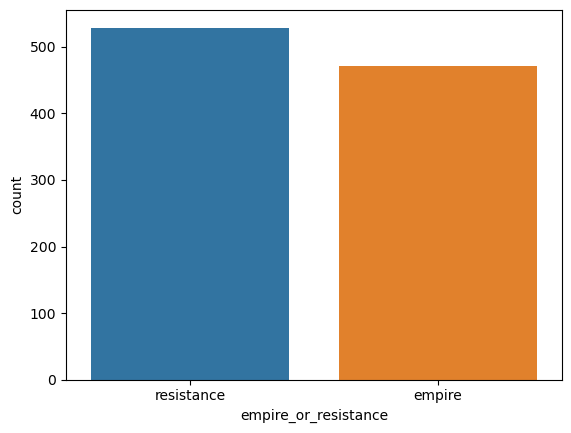

In [33]:
sns.countplot(data = swdata, x = 'empire_or_resistance')

In [41]:
clf = tree.DecisionTreeClassifier()

In [46]:
x = swdata[['homeworld', 'unit_type']]
x_ = pd.get_dummies(x)
y = swdata['is_resistance']

In [50]:
clf = clf.fit(x_, y)

In [55]:
y_pred = clf.predict(x_)

<Axes: >

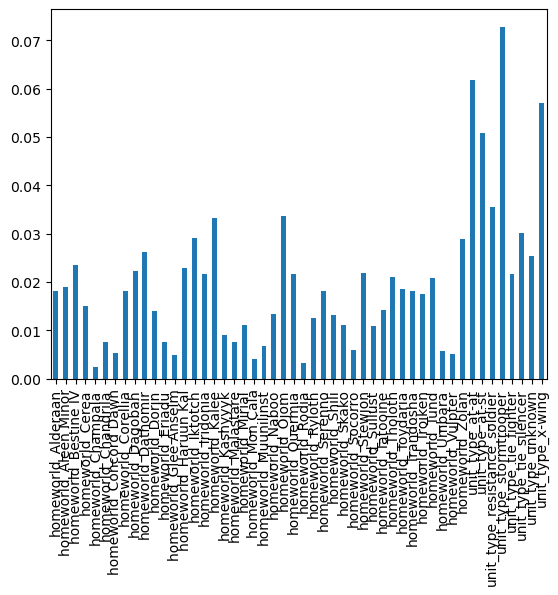

In [72]:
feat_importances = pd.Series(clf.feature_importances_, index=x_.columns)
feat_importances.plot(kind='bar')

In [69]:
# Open a file and use dump()
with open('model.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(clf, file)